In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


print(torch.__version__, torchvision.__version__)

2.3.1+cu121 0.18.1+cu121


# Getting Dataset


In [ ]:
# fashionMNIST

train_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor(), target_transform=None)

test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor(), target_transform=None)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# cc, h, w

image.shape

torch.Size([1, 28, 28])

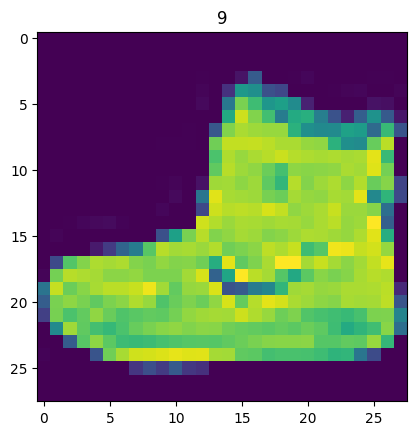

In [ ]:
plt.imshow(image.squeeze())
plt.title(label);

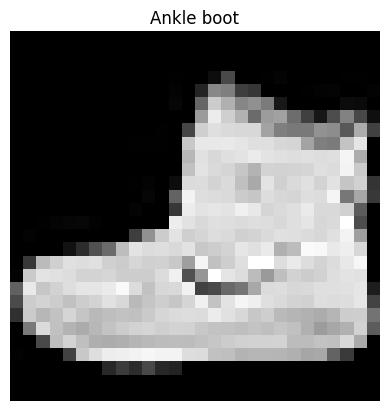

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

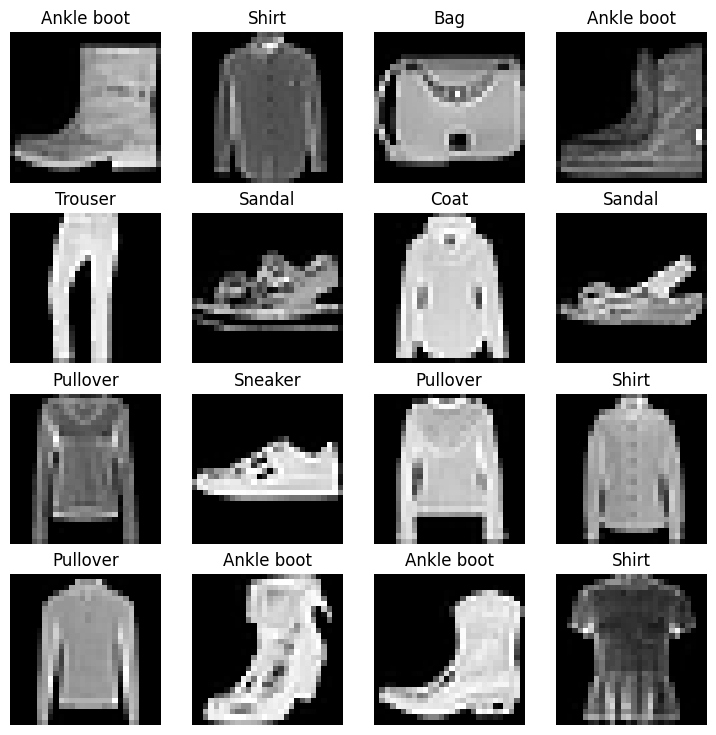

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78a7baee9ff0>,
 <torch.utils.data.dataloader.DataLoader at 0x78a7baee8e50>)

In [ ]:
len(train_dataloader) * BATCH_SIZE == len(train_data)

True

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

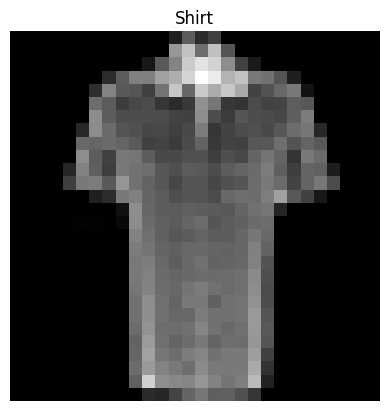

In [ ]:
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## Baseline Model

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(x.shape, output.shape)

torch.Size([1, 28, 28]) torch.Size([1, 784])


In [ ]:
output.squeeze().shape

torch.Size([784])

In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
# %pip install torchmetrics -q

In [ ]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
  print("helper_functions already exists")
else:
  req = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(req.content)
  print("File downloaded!")

File downloaded!


In [ ]:
from helper_functions import accuracy_fn

# loss_fn, optimizer, eval metrics

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.1)

In [ ]:
# helper for how fast model runs

from timeit import default_timer as timer

def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Runtime on {device}: {total_time:.3f}s")
  return total_time

In [ ]:
start_time = timer()
###
end_time = timer()
print_train_time(start_time, end_time, "cpu")

Runtime on cpu: 0.000s


3.2546999989335745e-05

## Creating a training loop and training on batches of data

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# runs over all data
epochs = 3

# training loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0
  # loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    # loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    # optim zero grad
    optimizer.zero_grad()
    # backward
    loss.backward()
    # step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # avg loss per batch
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(
      f"Train Loss: {train_loss:.4f}\tTest Loss: {test_loss:.4f}\tTest Acc: {test_acc:.2f}%\n")

train_end_time = timer()
total_cpu_train_time_model_0 = print_train_time(
    train_time_start_on_cpu, train_end_time, str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.5904	Test Loss: 0.5095	Test Acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.4763	Test Loss: 0.4799	Test Acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.4550	Test Loss: 0.4766	Test Acc: 83.43%

Runtime on cpu: 36.340s


In [ ]:
# making preds
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
y_pred

tensor([[ -4.2884,  -4.5163,  -2.8663,  -2.8026,  -4.5364,  10.6251,  -3.2177,
           5.2487,   3.1904,   3.6958],
        [  4.0112,  17.3848,   2.3789,   7.3795,   3.8355, -16.1455,  -3.0860,
           0.4360,  -4.1143,  -3.8946],
        [  2.7866,  -2.3651,   4.1910,   4.4484,   1.6574,  -2.5093,   5.4787,
          -7.0523,   0.5839, -10.1702],
        [ -0.7734,  -2.9671,   1.9678,   0.6928,   2.7401,   0.7660,  -0.2681,
          -1.9020,  10.3998,  -8.5007],
        [  3.2206,   1.0172,   7.0490,   0.7800,  11.2269,  -6.9325,   8.6063,
         -10.2186,   0.4854, -12.4510],
        [ -3.7998,  -1.7368,  -2.7868,  -0.5707,  -3.0465,   5.2985,  -3.0114,
           7.2965,   2.3428,  -0.2321],
        [ -3.1064,  -2.8652,  -3.0730,  -2.4402,  -3.2373,   4.7686,  -1.5414,
           5.4225,   1.8543,   6.1236],
        [  3.6788,  -1.5608,   5.4944,   1.0448,   4.0298,  -3.9816,   4.8922,
          -6.2331,   1.9170,  -8.0683],
        [  5.5474,  -1.8983,   6.7428,   4.2967,

In [ ]:
torch.cuda.is_available()

False

# Device Agnostic Code

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


print(torch.__version__, torchvision.__version__)

2.3.1+cu121 0.18.1+cu121


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU(),
    )

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.layer_stack(x)

In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
RANDOM_SEED = 42


model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_1.parameters(),
                             lr=0.1)

from helper_functions import accuracy_fn

In [ ]:
len(train_dataloader)

1875

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.to(device)
  # Put model on training mode
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss: {train_loss:.5f}\tTrain Acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for (X, y) in dataloader:
      X, y = X.to(device), y.to(device)
      test_preds = model(X)
      test_loss += loss_fn(test_preds, y)
      test_acc += accuracy_fn(y, test_preds.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  print(f"Test loss: {test_loss:.5f}\tTest Acc: {test_acc:.2f}%\n")

In [ ]:
# making preds
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}


In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(
      model=model_1, dataloader=train_dataloader, loss_fn=loss_fn,
      optimizer=optimizer, accuracy_fn=accuracy_fn)
  test_step(
      model=model_1, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

train_time_end = timer()
train_time_model_1 = print_train_time(train_time_start, train_time_end, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 1.11456	Train Acc: 58.46%
Test loss: 0.96320	Test Acc: 63.41%

Epoch: 1
------------
Train loss: 0.90905	Train Acc: 64.87%
Test loss: 0.74544	Test Acc: 72.61%

Epoch: 2
------------
Train loss: 0.59506	Train Acc: 78.26%
Test loss: 0.49534	Test Acc: 82.68%

Runtime on cpu: 37.148s


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss,
            "model_acc": acc}



In [ ]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)

model_1_results, train_time_model_1

({'model_name': 'FashionMNISTModelV1',
  'model_loss': tensor(0.4953),
  'model_acc': 82.67771565495208},
 37.148489283)

# Using a CNN

In [ ]:
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture replicating the TinyVGG model
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    print(f"Output shape of conv block 2: {x.shape}")
    return self.classifier(x)

In [ ]:
model_prac = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

model_prac

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_prac(torch.randn(size=(1, 28, 28)))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 490x10)

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))

In [ ]:
class_names[(model_2(rand_image_tensor.unsqueeze(0).to(device))).argmax(dim=1).item()]

'Pullover'

In [ ]:
x = nn.Flatten()
x(torch.randn(size=(10, 7, 7))).shape


torch.Size([10, 49])

In [ ]:
# creating dummy data

images = torch.randn(size=(1, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {images[0].shape}")

Image batch shape: torch.Size([1, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])


In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [ ]:
torch.manual_seed(42)
print(f"Original shape: {test_image.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_thru_conv = conv_layer(test_image)
print(f"Shape after conv: {test_image_thru_conv.shape}")

test_image_thru_conv_maxpool = max_pool_layer(test_image_thru_conv)
print(f"Shape after pooling: {test_image_thru_conv_maxpool.shape}")

Original shape: torch.Size([3, 64, 64])
Shape after conv: torch.Size([10, 64, 64])
Shape after pooling: torch.Size([10, 32, 32])


In [ ]:
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random Tensor:{random_tensor}, {random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max Pool Tensor:{max_pool_tensor}, {max_pool_tensor.shape}")

Random Tensor:tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]), torch.Size([1, 1, 2, 2])
Max Pool Tensor:tensor([[[[0.3367]]]]), torch.Size([1, 1, 1, 1])


In [ ]:
# loss fn, eval metrics and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
# training
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

train_start_time_model_2 = timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_end_time_model_2 = timer()
total_train_time_model_2 = print_train_time(
    train_start_time_model_2, train_end_time_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.59518	Train Acc: 78.38%
Test loss: 0.39500	Test Acc: 85.99%

Epoch: 1
----------
Train loss: 0.36536	Train Acc: 86.90%
Test loss: 0.35244	Test Acc: 86.91%

Epoch: 2
----------
Train loss: 0.32588	Train Acc: 88.13%
Test loss: 0.32719	Test Acc: 88.07%

Runtime on cpu: 187.688s


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3272),
 'model_acc': 88.06908945686901}

In [ ]:
import pandas as pd

In [ ]:
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

In [ ]:
compare_results["training_time"] = [total_cpu_train_time_model_0,
                                    train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,36.340332
1,FashionMNISTModelV1,tensor(0.4953),82.677716,37.148489
2,FashionMNISTModelV2,tensor(0.3272),88.069089,187.688245


Text(0, 0.5, 'model')

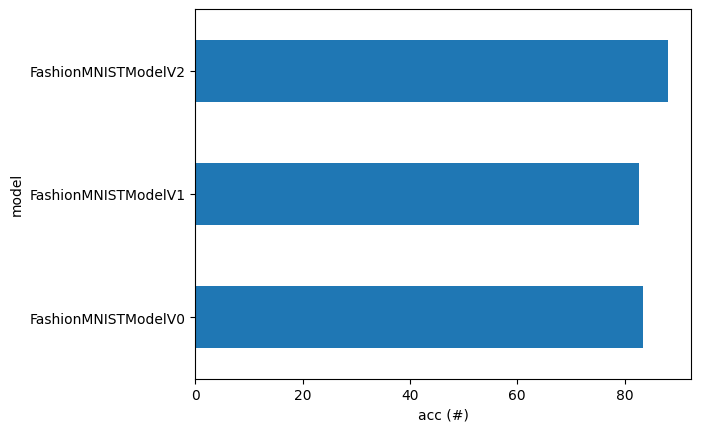

In [ ]:
# visualize

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")

plt.xlabel("acc (#)")
plt.ylabel("model")

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [ ]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = sample.unsqueeze(dim=1).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob)
  return pred_probs

In [ ]:
pred_probs = torch.stack(make_predictions(model_2, test_samples))
pred_labels = pred_probs.argmax(dim=1)

list(pred_labels.cpu().numpy()) == test_labels

False

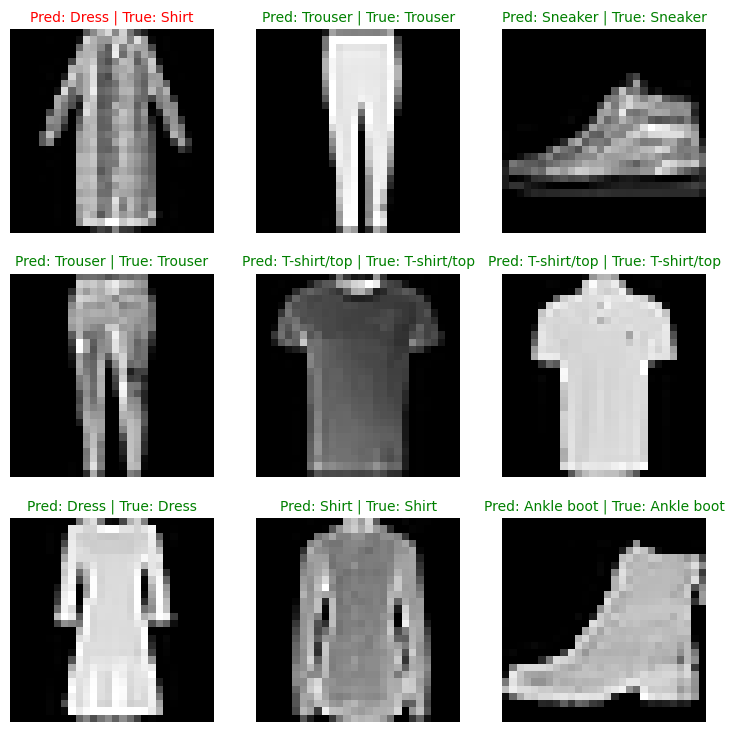

In [ ]:
plt.figure(figsize=(9, 9))
rows = 3
cols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(rows, cols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_labels[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | True: {truth_label}"
  if truth_label == pred_label:
    plt.title(title_text, c="g", fontsize=10)
  else:
    plt.title(title_text, c="r", fontsize=10)
  plt.axis(False)


In [ ]:
%pip install torchmetrics mlxtend -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 12.5 MB/s eta 0:00:00


In [ ]:
from tqdm.auto import tqdm

y_preds = []

model_2.eval()
with torch.inference_mode():
  for (X, y) in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
import torchmetrics, mlxtend
torchmetrics.__version__, mlxtend.__version__

('1.4.1', '0.23.1')

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

confmat_tensor

tensor([[852,   2,  11,  30,   3,   1,  94,   0,   7,   0],
        [  4, 972,   0,  15,   3,   0,   5,   0,   1,   0],
        [ 12,   1, 748,  11, 129,   0,  97,   0,   2,   0],
        [ 22,   4,   9, 913,  20,   0,  30,   0,   2,   0],
        [  2,   2,  46,  40, 824,   0,  86,   0,   0,   0],
        [  1,   0,   0,   2,   0, 977,   0,  14,   1,   5],
        [150,   0,  55,  33,  83,   0, 666,   0,  13,   0],
        [  0,   0,   0,   0,   0,  22,   0, 946,   0,  32],
        [  3,   1,   3,   8,   3,   4,  16,   5, 957,   0],
        [  0,   0,   0,   1,   0,  10,   1,  37,   1, 950]])

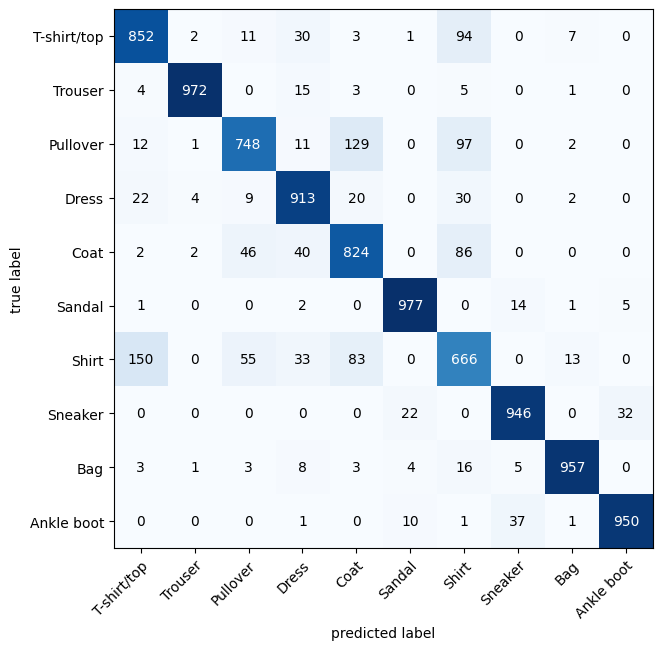

In [ ]:
fog, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

# Saving and loading model

In [ ]:
from pathlib import Path

models_path = Path("models")
models_path.mkdir(parents=True, exist_ok=True)

model_name = "model_2_convnet.pth"
model_save_path = models_path / model_name

torch.save(obj=model_2.state_dict(), f=model_save_path)
print("file saved!")

file saved!


In [ ]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(1, 10, len(class_names))

loaded_model_2.load_state_dict(torch.load(f=model_save_path))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3272),
 'model_acc': 88.06908945686901}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3272),
 'model_acc': 88.06908945686901}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

<ipython-input-89-294cdcbd7522>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.isclose(torch.tensor(model_2_results["model_loss"]),
<ipython-input-89-294cdcbd7522>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(loaded_model_2_results["model_loss"]),


tensor(True)